# Meteo: Air temperature (TA) (2005-2024)

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# Variable

In [24]:
varname = 'TA_T1_2_1'
var = "TA"  # Name shown in plots
units = "°C"

# Imports

In [25]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import diive as dv
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear
from diive.core.plotting.bar import LongtermAnomaliesYear

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


# Load data

In [26]:
SOURCEDIR = r"../80_FINALIZE"
FILENAME = r"81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
df

Loaded .parquet file ..\80_FINALIZE\81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet (1.020 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-12  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-18  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-24  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-6  .SWC_GF1_0.15_1_gfXG_MEAN3H-12  .SWC_GF1_0.15_1_gfXG_MEAN3H-18  .SWC_GF1_0.15_1_gfXG_MEAN3H-24  .SWC_GF1_0.15_1_gfXG_MEAN3H-6  .TS_GF1_0.04_1_gfXG_MEAN3H-12  .TS_GF1_0.04_1_gfXG_MEAN3H-18  .TS_GF1_0.04_1_gfXG_MEAN3H-24  .TS_GF1_0.04_1_gfXG_MEAN3H-6  .TS_GF1_0.15_1_gfXG_MEAN3H-12  .TS_GF1_0.15_1_gfXG_MEAN3H-18  .TS_GF1_0.15_1_gfXG_MEAN3H-24  ...  GPP_NT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF  GPP_DT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF_SD  GPP_DT_CUT_50_gfRF_SD  G_GF1_0.03_1  G_GF1_0.03_2  G_GF1_0.05_1  G_GF1_0.05_2  G_GF4_0.02_1  G_GF5_0.02_1  LW_OUT_T1_2_1  NETRAD_T1_2_1  PPFD_OUT_T1_2_2  SW_OUT_T1_2_1
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ...                                                                                                                                                                                                                                                              
2005-01-01 00:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.918553             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 00:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.917972             0.092682                 0.0                0.079688                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.163001             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN  

In [27]:
series = df[varname].copy()
series

TIMESTAMP_MIDDLE
2005-01-01 00:15:00    1.566667
2005-01-01 00:45:00    1.533333
2005-01-01 01:15:00    1.566667
2005-01-01 01:45:00    1.566667
2005-01-01 02:15:00    1.500000
                         ...   
2024-12-31 21:45:00   -1.919472
2024-12-31 22:15:00   -2.104678
2024-12-31 22:45:00   -2.089444
2024-12-31 23:15:00   -2.355761
2024-12-31 23:45:00   -2.578839
Freq: 30min, Name: TA_T1_2_1, Length: 350640, dtype: float64

In [28]:
xlabel = f"{var} ({units})"
xlim = [series.min(), series.max()]

</br>

# Stats

## Overall mean

In [29]:
_yearly_avg = series.resample('YE').mean()
_overall_mean = _yearly_avg.mean()
_overall_sd = _yearly_avg.std()
print(f"Overall mean: {_overall_mean} +/- {_overall_sd}")

Overall mean: 9.988191896143565 +/- 0.6491468905031849


## Yearly means

In [46]:
ym = series.resample('YE').mean()
ym

TIMESTAMP_MIDDLE
2005-12-31     9.500346
2006-12-31     9.510808
2007-12-31    10.020665
2008-12-31     9.509768
2009-12-31     9.768376
2010-12-31     8.602752
2011-12-31     9.961233
2012-12-31     9.500586
2013-12-31     8.972617
2014-12-31    10.243456
2015-12-31    10.214341
2016-12-31     9.959387
2017-12-31    10.158153
2018-12-31    11.020365
2019-12-31    10.336325
2020-12-31    10.566112
2021-12-31     9.480925
2022-12-31    11.064683
2023-12-31    10.773193
2024-12-31    10.599748
Freq: YE-DEC, Name: TA_T1_2_1, dtype: float64

In [47]:
ym.sort_values(ascending=False)

TIMESTAMP_MIDDLE
2022-12-31    11.064683
2018-12-31    11.020365
2023-12-31    10.773193
2024-12-31    10.599748
2020-12-31    10.566112
2019-12-31    10.336325
2014-12-31    10.243456
2015-12-31    10.214341
2017-12-31    10.158153
2007-12-31    10.020665
2011-12-31     9.961233
2016-12-31     9.959387
2009-12-31     9.768376
2006-12-31     9.510808
2008-12-31     9.509768
2012-12-31     9.500586
2005-12-31     9.500346
2021-12-31     9.480925
2013-12-31     8.972617
2010-12-31     8.602752
Name: TA_T1_2_1, dtype: float64

## Monthly averages

In [31]:
seriesdf = pd.DataFrame(series)
seriesdf['MONTH'] = seriesdf.index.month
seriesdf['YEAR'] = seriesdf.index.year
monthly_avg = seriesdf.groupby(['YEAR', 'MONTH'])[varname].mean().unstack()
monthly_avg

MONTH        1         2         3          4          5          6          7          8          9          10        11        12
YEAR                                                                                                                                
2005   0.210125 -0.801339  5.713844   9.710972  14.313306  18.916042  18.890143  16.856317  15.635251  10.819029  3.717182 -0.651789
2006  -2.325830  0.080485  3.055509   8.319310  13.250669  17.499912  21.749708  14.987129  16.731619  12.433040  5.730513  2.035287
2007   4.028546  3.698813  5.171103  12.285550  14.959564  17.783585  17.990020  17.422618  13.303557   9.495752  2.811688  0.882221
2008   1.432444  2.281177  4.975142   8.107183  15.310608  17.852078  18.675324  17.944528  12.829824  10.133216  3.764944  0.490034
2009  -1.625389  0.180946  4.377160  10.899647  15.477443  17.023732  18.993706  19.916496  15.428819   9.176833  6.090314  0.687469
2010  -1.816758  0.199619  4.099154   9.068338  11.873036  16.897946  19.849270  17.293014  12.834795   8.677442  5.026717 -1.278987
2011   0.892078  2.255540  5.476857  11.008608  14.657345  16.901711  16.594692  18.906124  15.817371   9.197266  4.117070  3.222475
2012   2.219987 -3.364431  6.058907   8.741281  14.288917  17.940666  18.116941  19.327690  13.941950   9.350884  5.471329  1.343973
2013   0.716500 -0.510813  2.303841   8.682419  11.226284  16.235882  20.530431  18.248934  14.630326  11.306503  4.210245 -0.573077
2014   2.091937  3.128287  5.613430  10.028926  12.870555  17.967155  17.843781  16.464852  15.091786  12.061521  6.657980  2.695666
2015   1.596828 -0.514620  5.819505   9.362186  14.146480  18.346357  21.759891  19.864031  13.115153   9.281210  6.546627  2.420249
2016   2.484183  4.107598  4.715634   8.994764  12.895846  17.391673  19.833336  18.962105  16.802195   8.680793  4.660996 -0.135555
2017  -2.624498  3.283107  7.756242   8.240388  14.695983  20.176124  19.771637  19.692754  13.370492  10.757406  4.554422  1.742608
2018   4.936138 -0.190323  3.849562  12.070434  15.426589  18.690051  20.834856  20.433843  16.170283   9.997433  5.370321  3.835440
2019   0.418184  1.984079  6.500643   8.652861  11.158806  19.701160  20.789025  18.818713  15.077914  11.575566  5.422591  3.370313
2020   1.635296  5.970656  5.577609  11.320013  13.814061  16.748215  19.583089  19.363624  15.937522   9.684012  5.287703  1.801799
2021   0.320515  2.558160  5.011026   7.622137  11.139938  18.945016  18.465003  17.840879  15.945695   8.839891  4.002620  2.687427
2022   1.159756  4.287937  5.527706   9.227786  16.238983  19.602645  20.641075  19.633025  14.191446  12.902621  6.668936  2.213690
2023   1.870183  2.294506  6.381045   8.082595  13.966407  19.479169  19.940537  19.474791  17.366343  11.646145  5.410159  2.779639
2024   1.536044  5.813781  7.137185   9.100171  13.630944  17.819154  20.193731  20.654355  14.015072  11.196474  4.607912  1.284772

## Number of days below 0°C

TA_T1_2_1  YEAR
TIMESTAMP_MIDDLE                 
2005                     94  2005
2006                    107  2006
2007                    100  2007
2008                    112  2008
2009                    107  2009
2010                    118  2010
2011                     98  2011
2012                    100  2012
2013                    113  2013
2014                     78  2014
2015                     97  2015
2016                     96  2016
2017                    102  2017
2018                     81  2018
2019                     96  2019
2020                     88  2020
2021                    104  2021
2022                     91  2022
2023                     91  2023
2024                     85  2024

Average per year: 97.9 +/- 10.57 SD


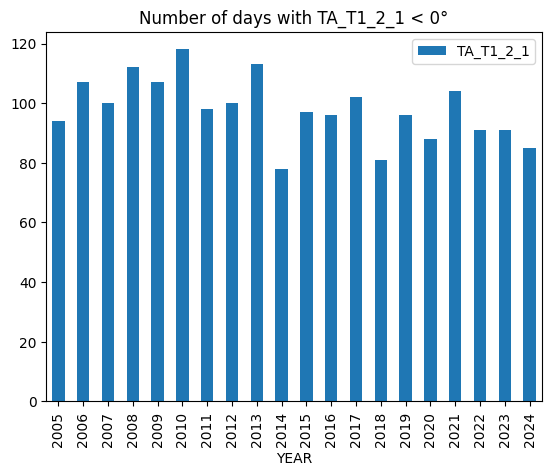

In [32]:
plotdf = df[[varname]].copy()
plotdf = plotdf.resample('D').min()
belowzero = plotdf.loc[plotdf[varname] < 0].copy()
belowzero = belowzero.groupby(belowzero.index.year).count()
belowzero["YEAR"] = belowzero.index
belowzero
belowzero.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} < 0°");
display(belowzero)
print(f"Average per year: {belowzero[varname].mean()} +/- {belowzero[varname].std():.2f} SD")

## Number of days above 30°C

TA_T1_2_1  YEAR
TIMESTAMP_MIDDLE                 
2005                      8  2005
2006                     17  2006
2007                      9  2007
2008                     12  2008
2009                     18  2009
2010                     14  2010
2011                     10  2011
2012                     13  2012
2013                     14  2013
2014                      8  2014
2015                     30  2015
2016                     11  2016
2017                     28  2017
2018                     26  2018
2019                     21  2019
2020                     15  2020
2021                      9  2021
2022                     22  2022
2023                     24  2023
2024                     20  2024

Average per year: 16.45 +/- 6.89 SD


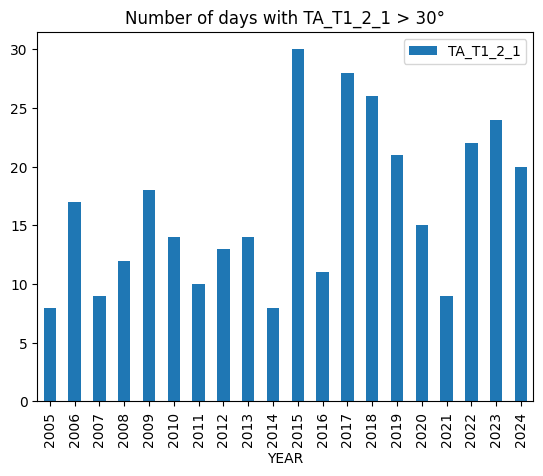

In [33]:
plotdf = df[[varname]].copy()
plotdf = plotdf.resample('D').max()
above = plotdf.loc[plotdf[varname] > 30].copy()
above = above.groupby(above.index.year).count()
above["YEAR"] = above.index
above.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} > 30°");
display(above)
print(f"Average per year: {above[varname].mean()} +/- {above[varname].std():.2f} SD")

</br>

# Heatmap plots

## Half-hourly

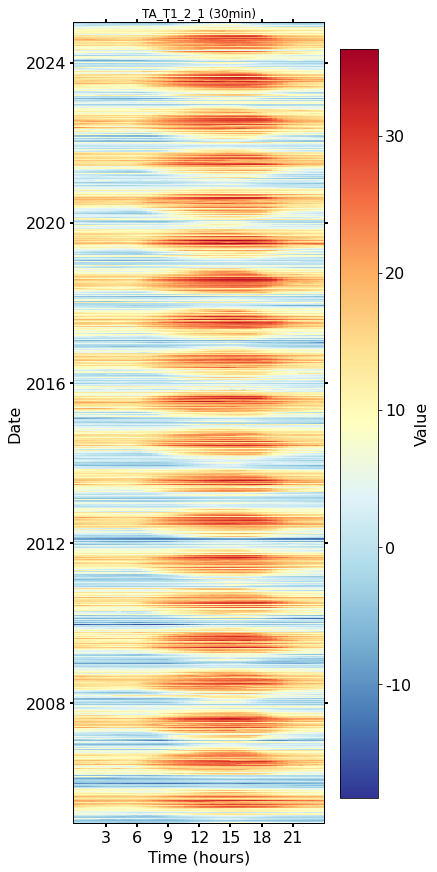

In [34]:
fig, axs = plt.subplots(ncols=1, figsize=(6, 12), dpi=72, layout="constrained")
dv.heatmapdatetime(series=series, ax=axs, cb_digits_after_comma=0).plot()

## Monthly

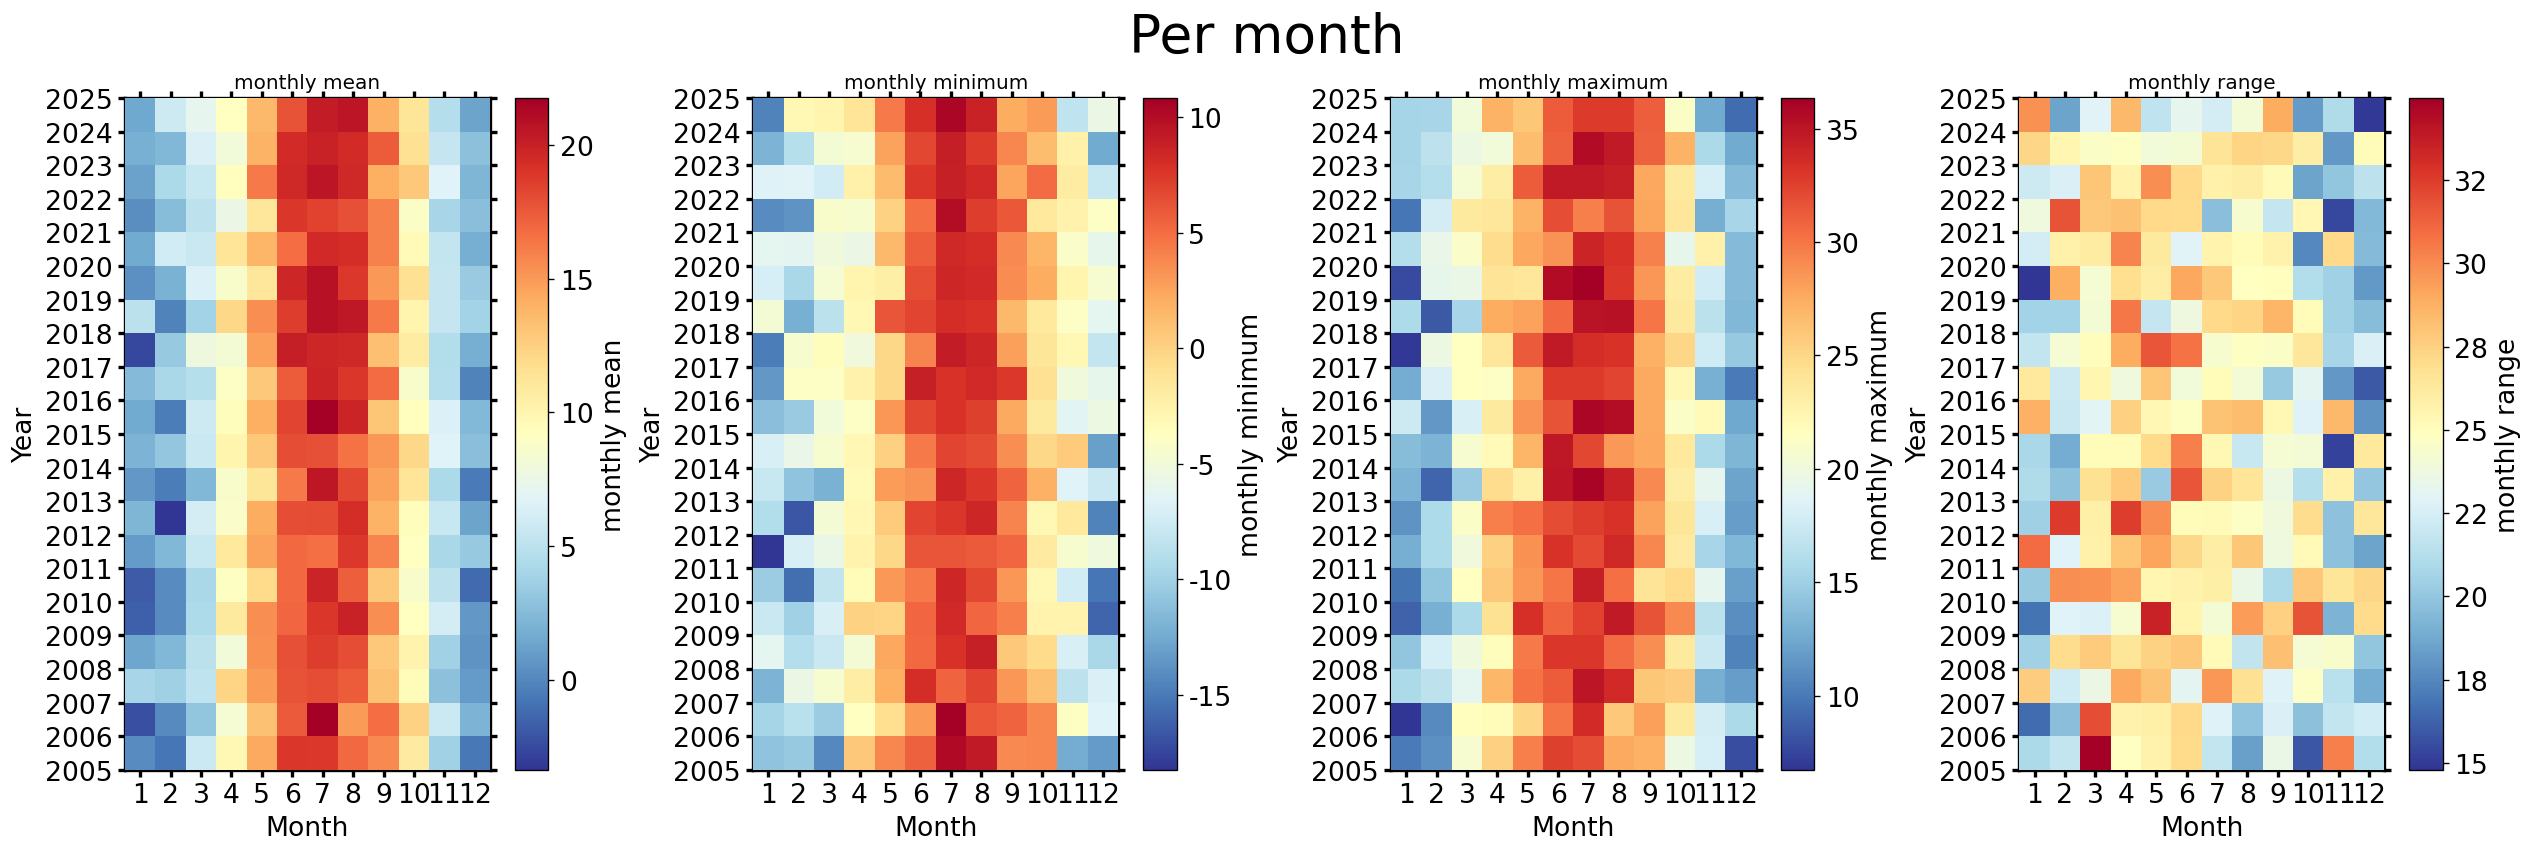

In [35]:
fig, axs = plt.subplots(ncols=4, figsize=(21, 7), dpi=120, layout="constrained")
fig.suptitle(f'Per month', fontsize=32)
dv.heatmapyearmonth(series_monthly=series.resample('M').mean(), title="monthly mean", ax=axs[0], cb_digits_after_comma=0, zlabel="monthly mean").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').min(), title="monthly minimum", ax=axs[1], cb_digits_after_comma=0, zlabel="monthly minimum").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').max(), title="monthly maximum", ax=axs[2], cb_digits_after_comma=0, zlabel="monthly maximum").plot()
_range = series.resample('M').max().sub(series.resample('M').min())
dv.heatmapyearmonth(series_monthly=_range, title="monthly range", ax=axs[3], cb_digits_after_comma=0, zlabel="monthly range").plot()

## Monthly ranks

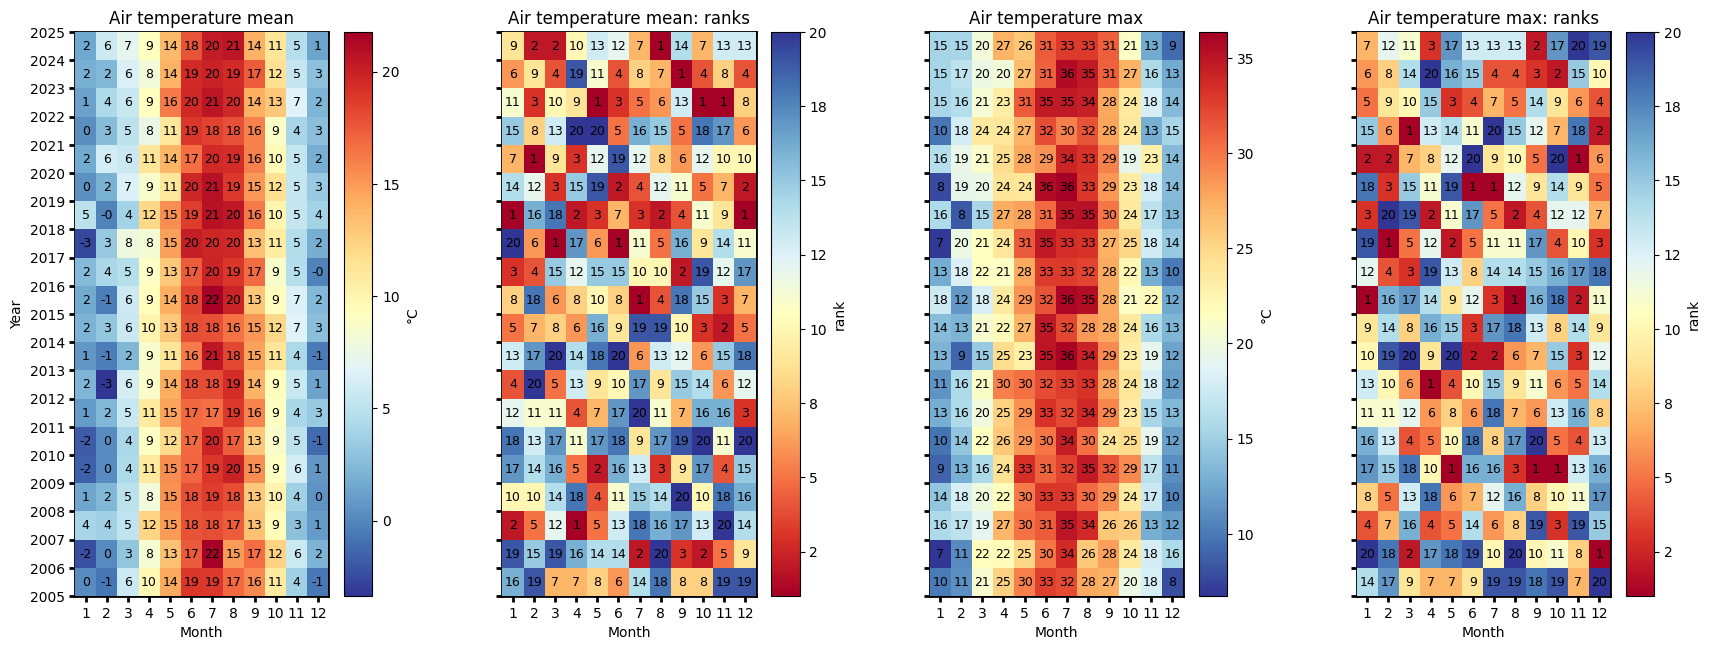

In [36]:
# Figure
fig = plt.figure(facecolor='white', figsize=(17, 6))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.35, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_mean_ranks = fig.add_subplot(gs[0, 1])
ax_max = fig.add_subplot(gs[0, 2])
ax_max_ranks = fig.add_subplot(gs[0, 3])
params = {'axlabels_fontsize': 10, 'ticks_labelsize': 10, 'cb_labelsize': 10}
dv.heatmapyearmonth_ranks(ax=ax_mean, series=series, agg='mean', ranks=False, zlabel="°C", cmap="RdYlBu_r", show_values=True, **params).plot()

hm_mean_ranks = dv.heatmapyearmonth_ranks(ax=ax_mean_ranks, series=series, agg='mean', show_values=True, **params)
hm_mean_ranks.plot()

dv.heatmapyearmonth_ranks(ax=ax_max, series=series, agg='max', ranks=False, zlabel="°C", cmap="RdYlBu_r", show_values=True, **params).plot()
dv.heatmapyearmonth_ranks(ax=ax_max_ranks, series=series, agg='max', show_values=True, **params).plot()

ax_mean.set_title("Air temperature mean", color='black')
ax_mean_ranks.set_title("Air temperature mean: ranks", color='black')
ax_max.set_title("Air temperature max", color='black')
ax_max_ranks.set_title("Air temperature max: ranks", color='black')

ax_mean.tick_params(left=True, right=False, top=False, bottom=True,
                    labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_mean_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                   labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

ax_mean_ranks.set_ylabel("")
ax_max.set_ylabel("")
ax_max_ranks.set_ylabel("")

fig.show()

### Mean ranks per year

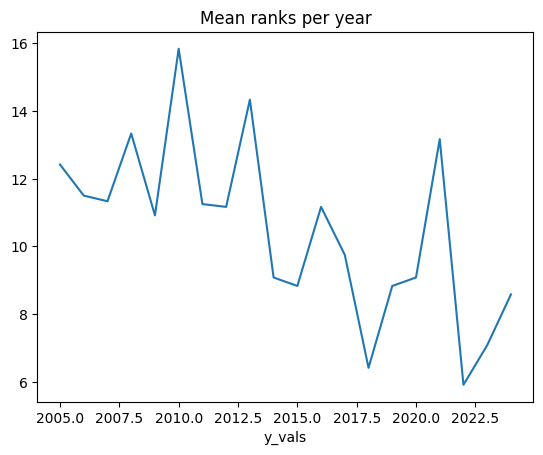

In [37]:
hm_mean_ranks.hm.get_plot_data().mean(axis=1).plot(title="Mean ranks per year");

</br>

# Ridgeline plots

## Yearly

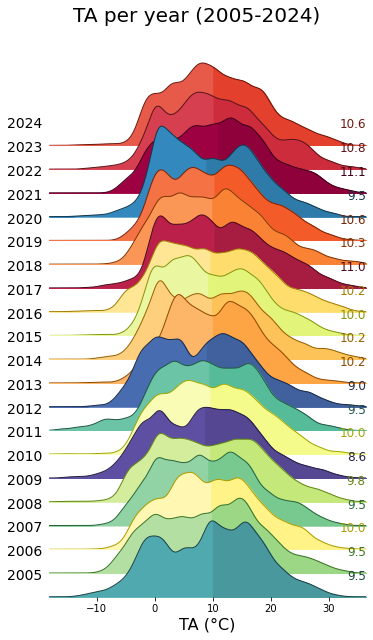

In [38]:
rp = dv.ridgeline(series=series)
rp.plot(
    how='yearly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.07],  # min/max as list
    hspace=-0.8,  # overlap between months
    xlabel=f"{var} ({units})",
    fig_width=5,
    fig_height=9,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per year (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Monthly

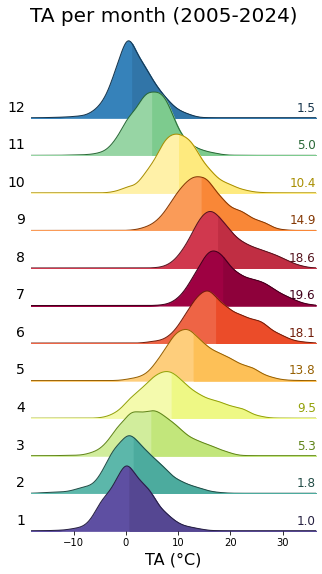

In [39]:
rp.plot(
    how='monthly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.14],  # min/max as list
    hspace=-0.6,  # overlap between months
    xlabel=f"{var} ({units})",
    fig_width=4.5,
    fig_height=8,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per month (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Weekly

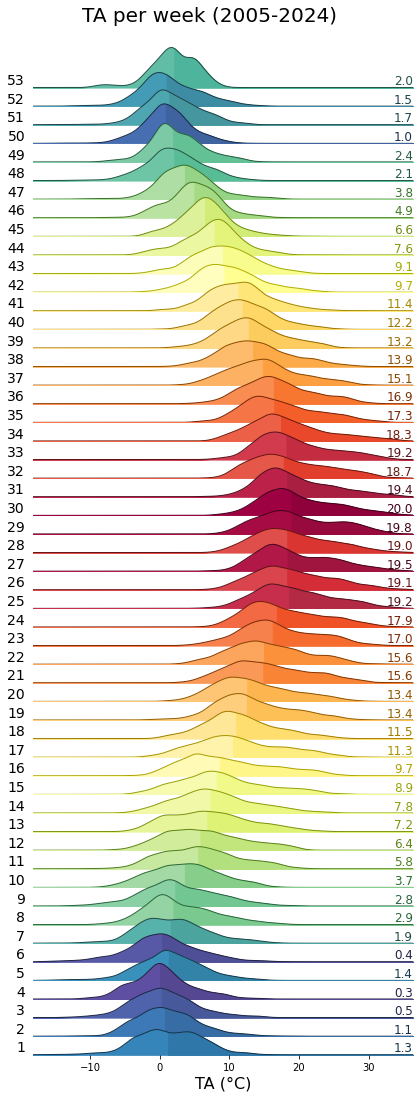

In [40]:
rp.plot(
    how='weekly',
    kd_kwargs=None,  # params from scikit KernelDensity as dict
    xlim=xlim,  # min/max as list
    ylim=[0, 0.15],  # min/max as list
    hspace=-0.6,  # overlap
    xlabel=f"{var} ({units})",
    fig_width=6,
    fig_height=16,
    shade_percentile=0.5,
    show_mean_line=False,
    fig_title=f"{var} per week (2005-2024)",
    fig_dpi=72,
    showplot=True,
    ascending=False
)

## Single years per month

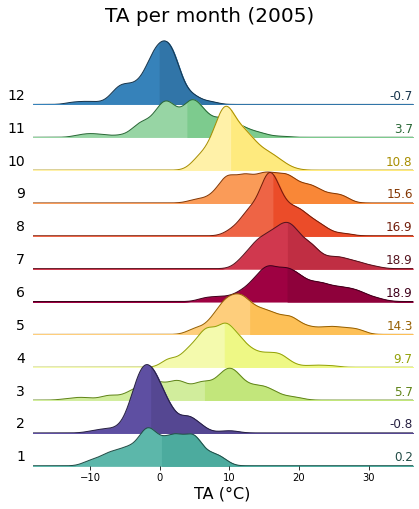

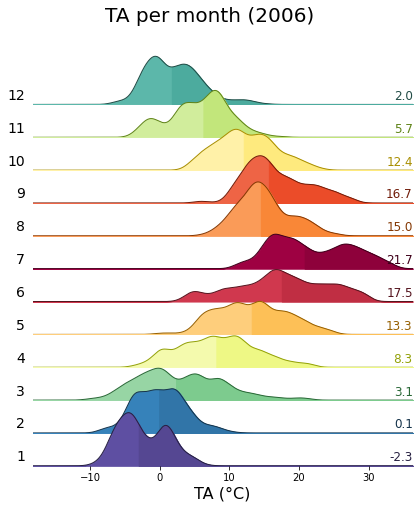

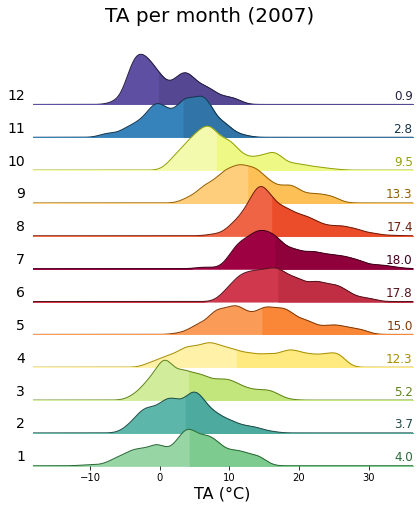

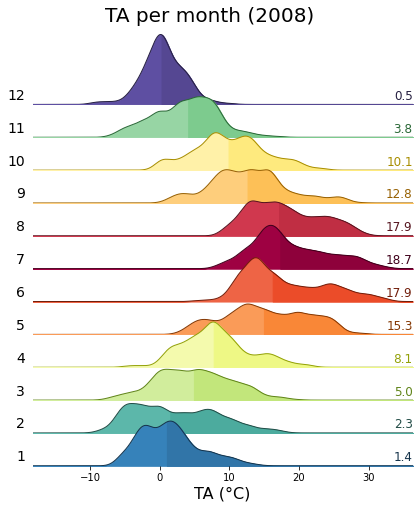

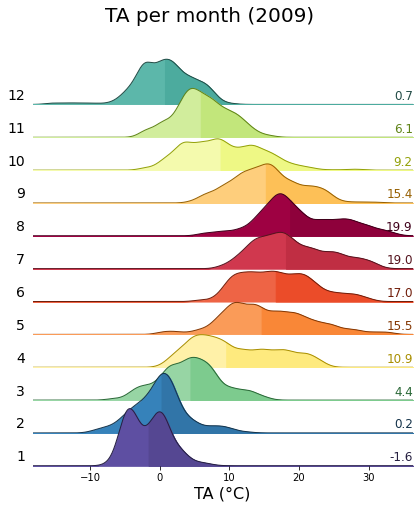

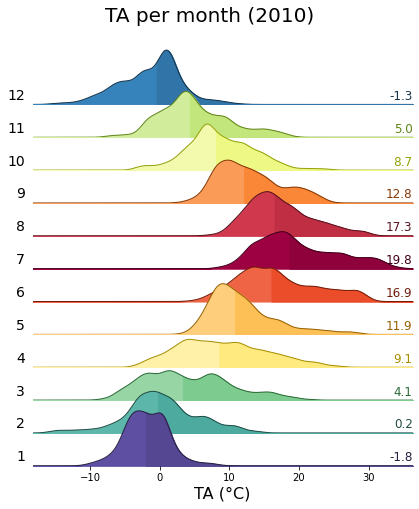

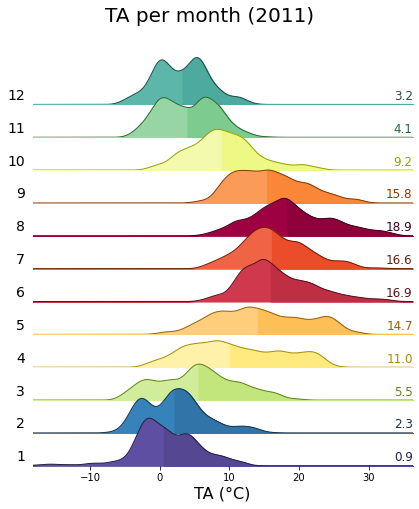

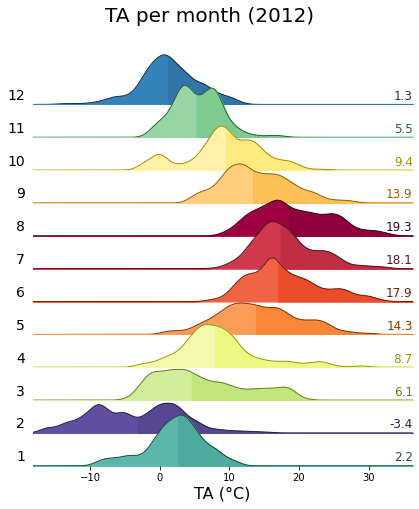

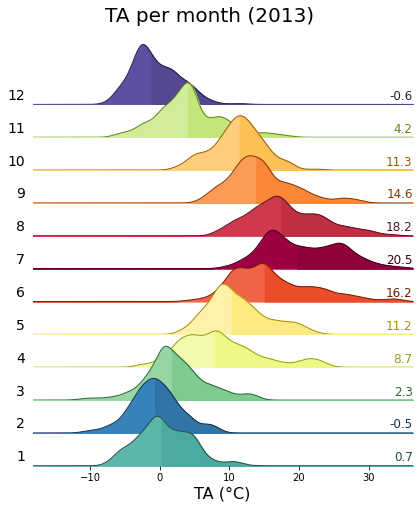

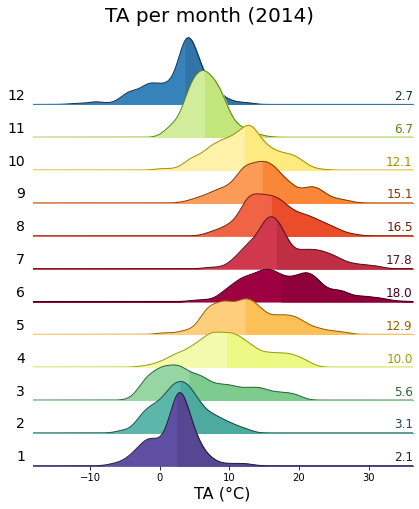

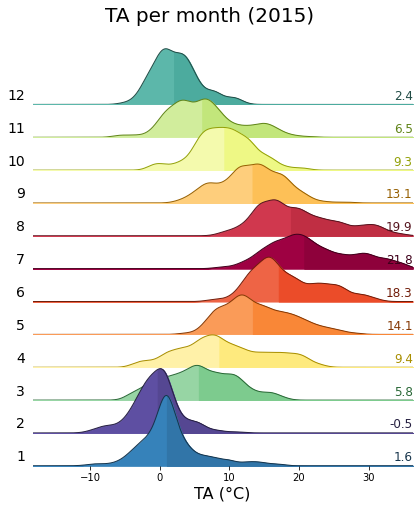

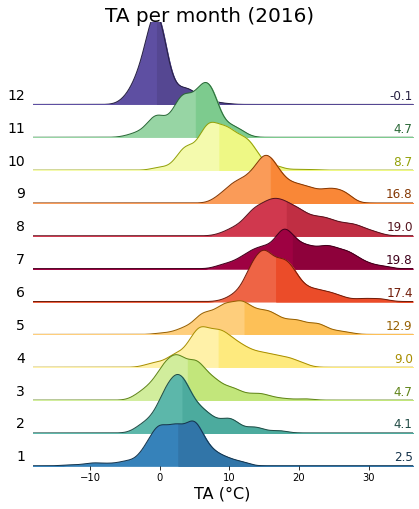

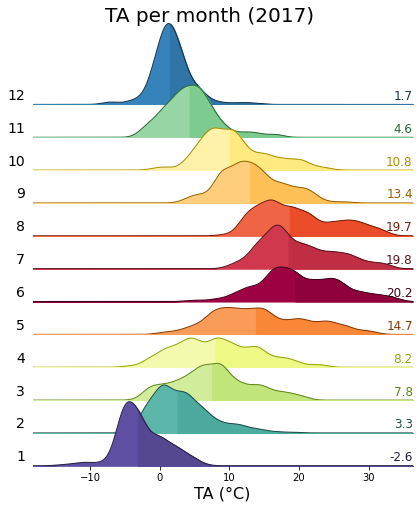

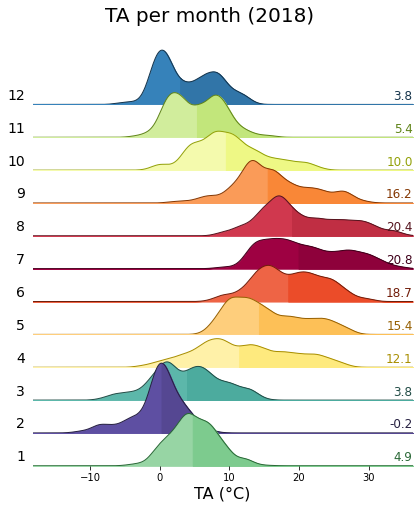

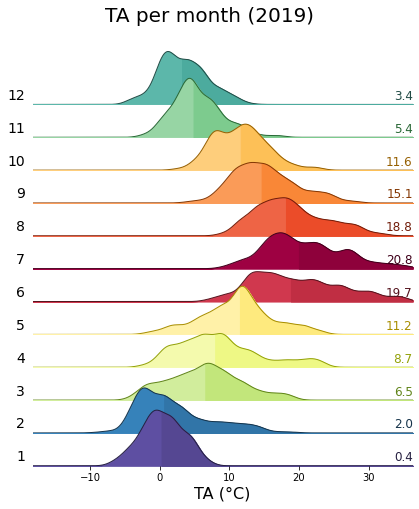

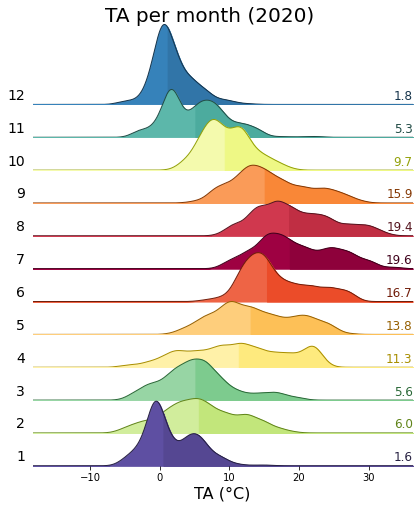

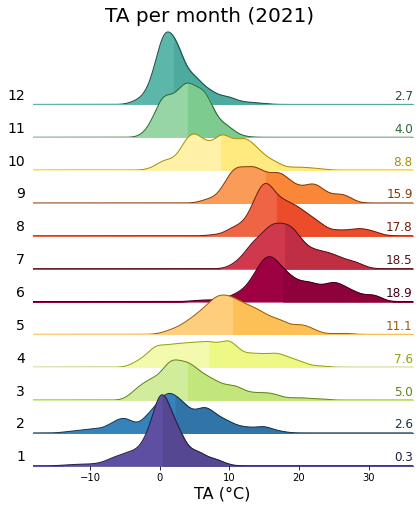

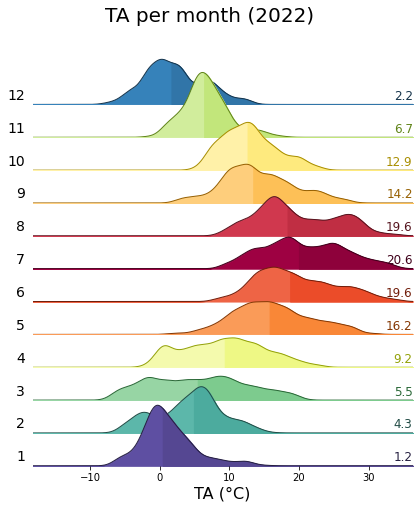

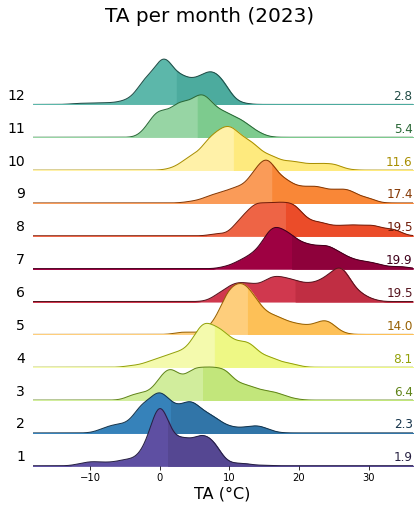

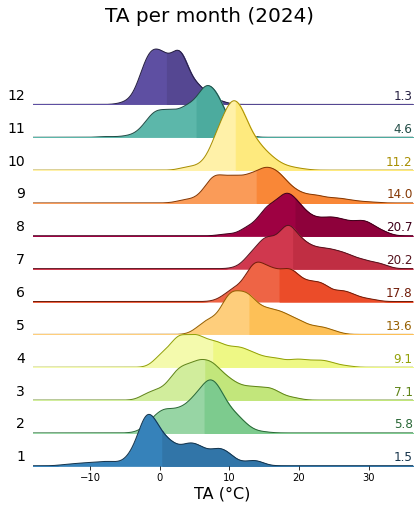

In [41]:
uniq_years = series.index.year.unique()
for uy in uniq_years:
    series_yr = series.loc[series.index.year == uy].copy()
    rp = dv.ridgeline(series=series_yr)
    rp.plot(
        how='monthly',
        kd_kwargs=None,  # params from scikit KernelDensity as dict
        xlim=xlim,  # min/max as list
        ylim=[0, 0.18],  # min/max as list
        hspace=-0.6,  # overlap
        xlabel=f"{var} ({units})",
        fig_width=6,
        fig_height=7,
        shade_percentile=0.5,
        show_mean_line=False,
        fig_title=f"{var} per month ({uy})",
        fig_dpi=72,
        showplot=True,
        ascending=False
    )

## Single years per week

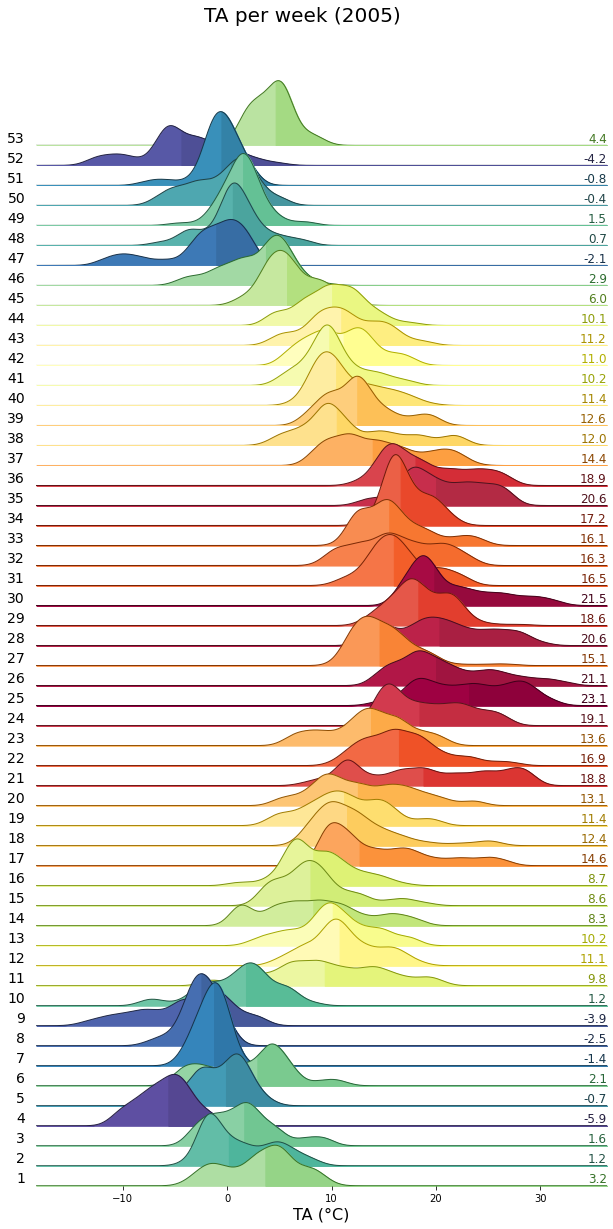

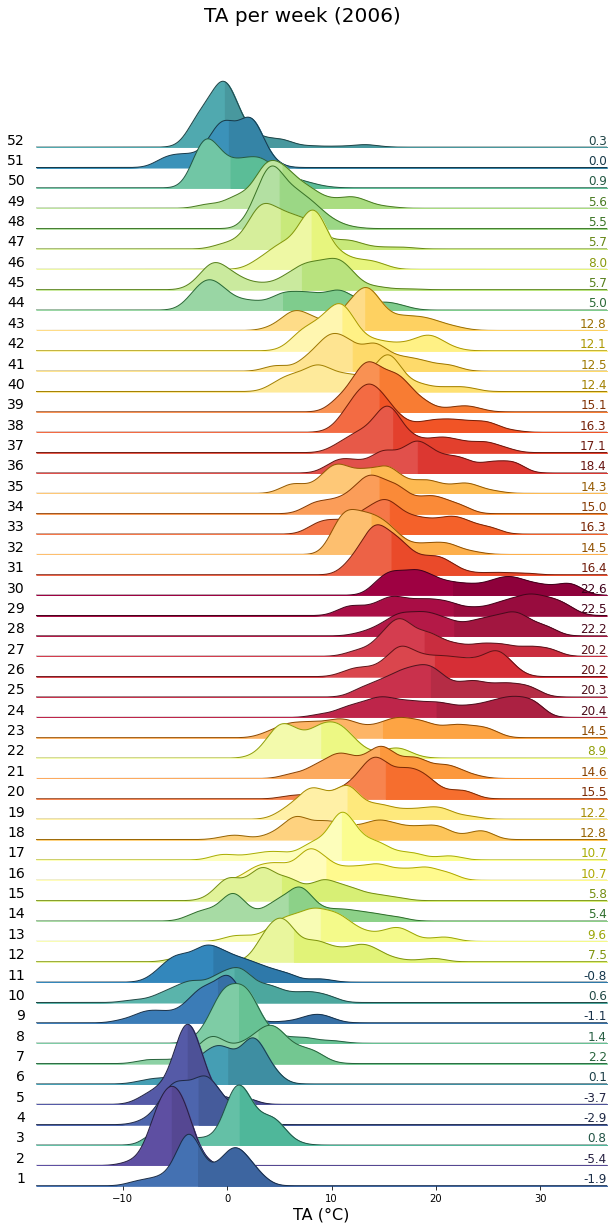

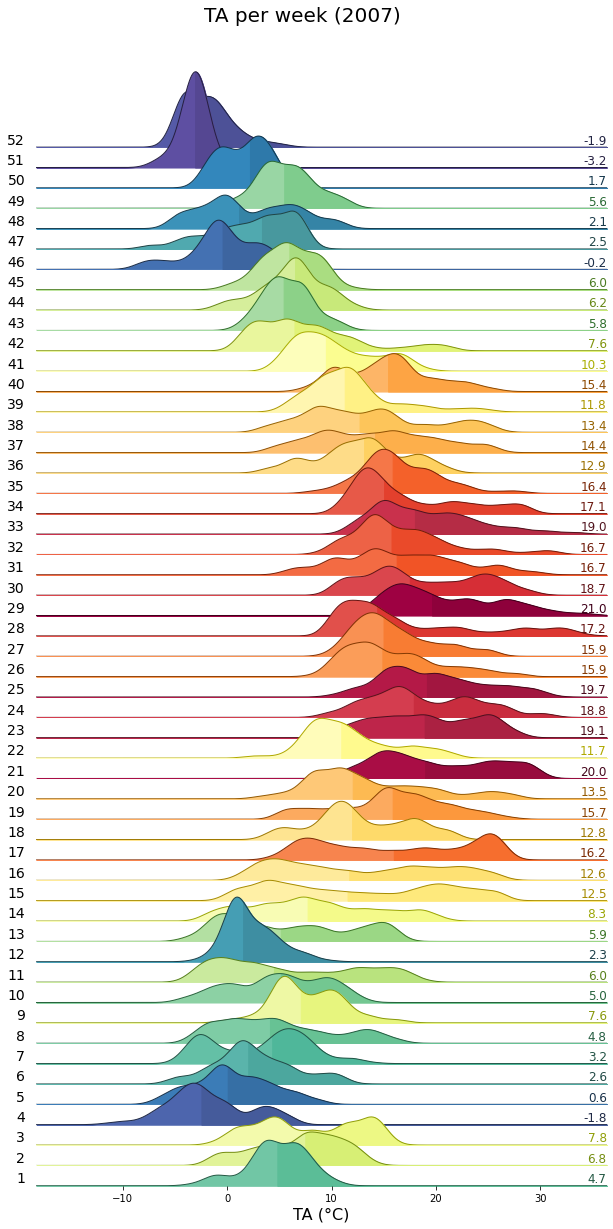

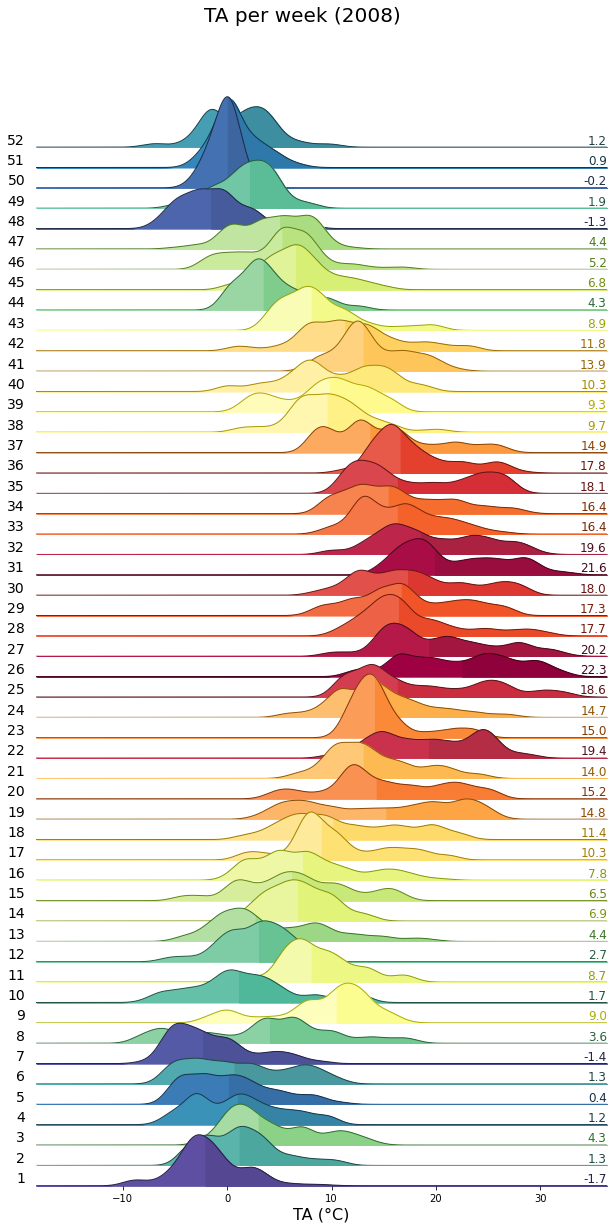

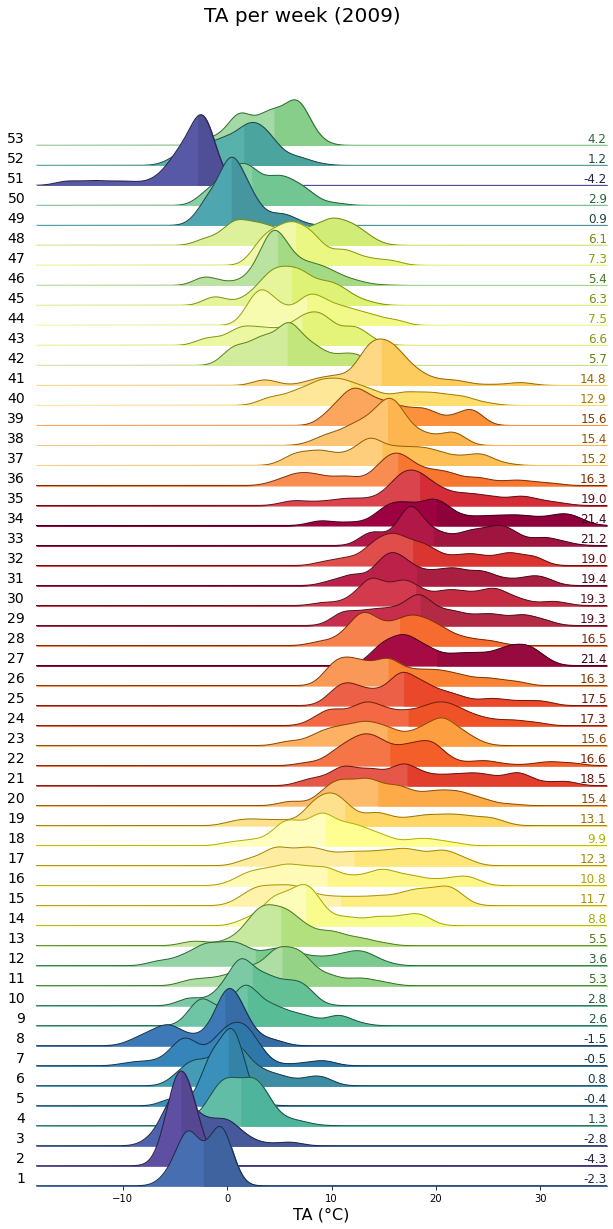

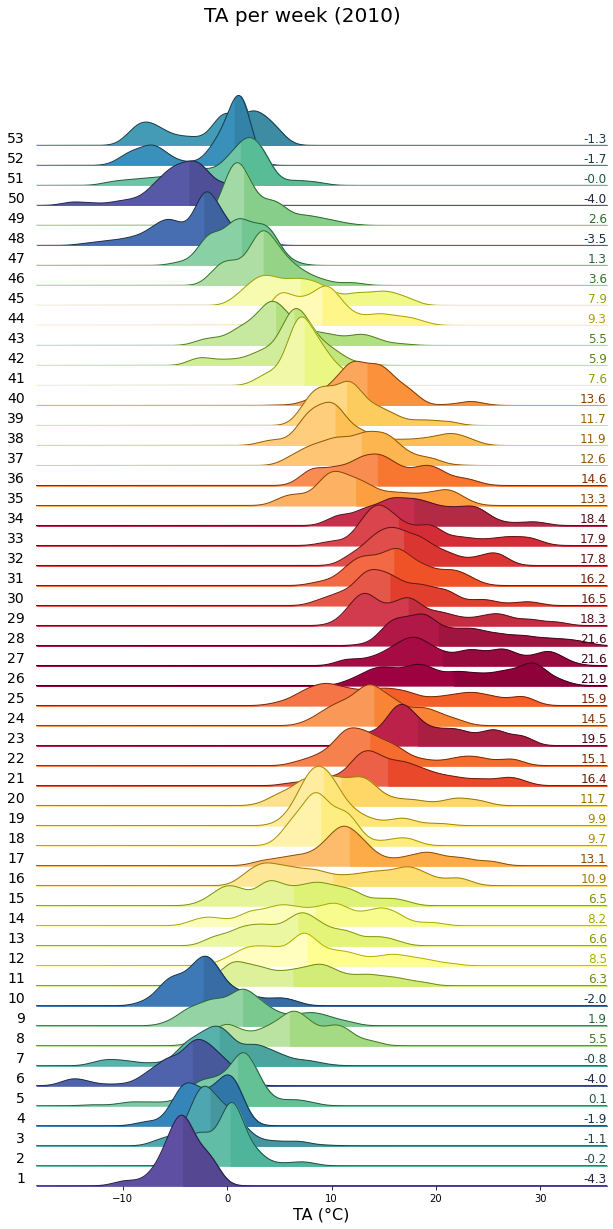

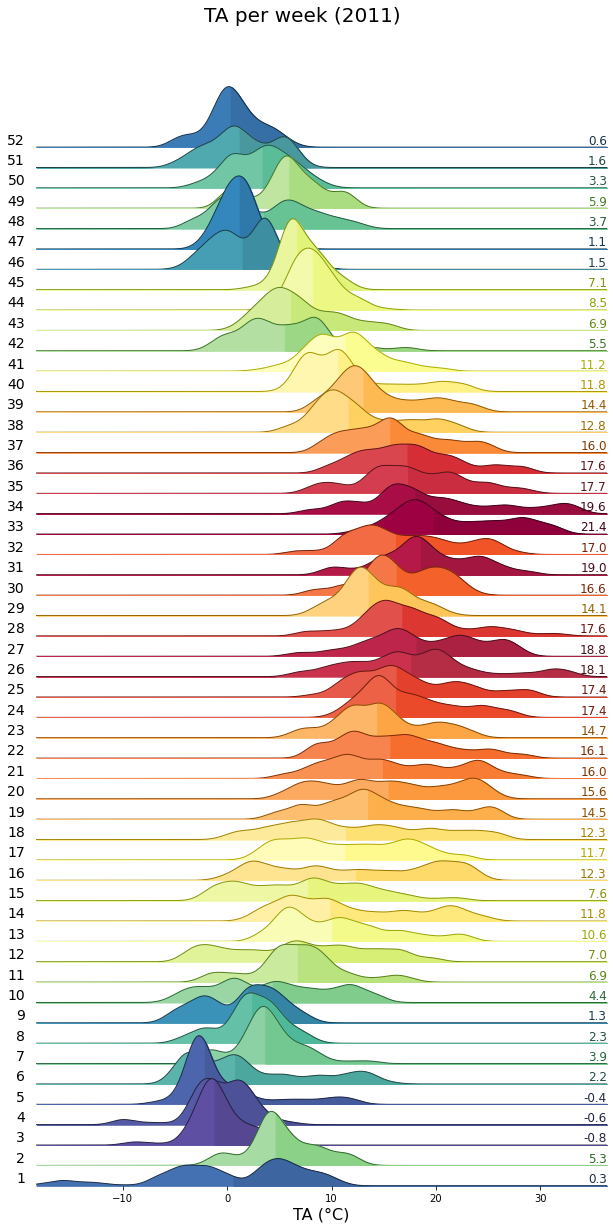

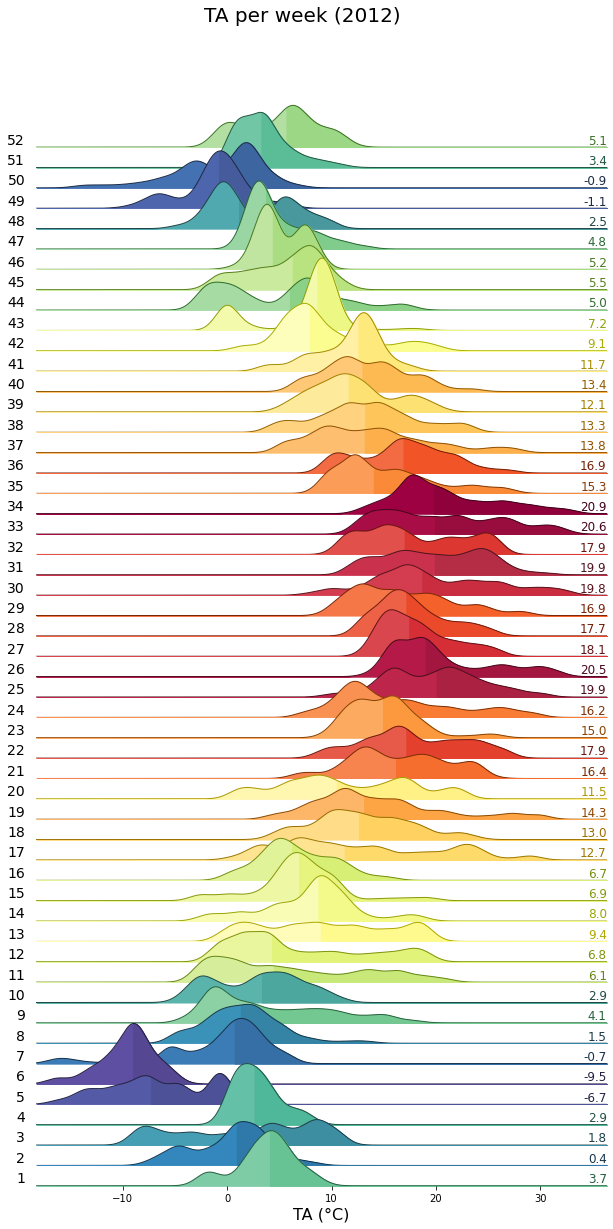

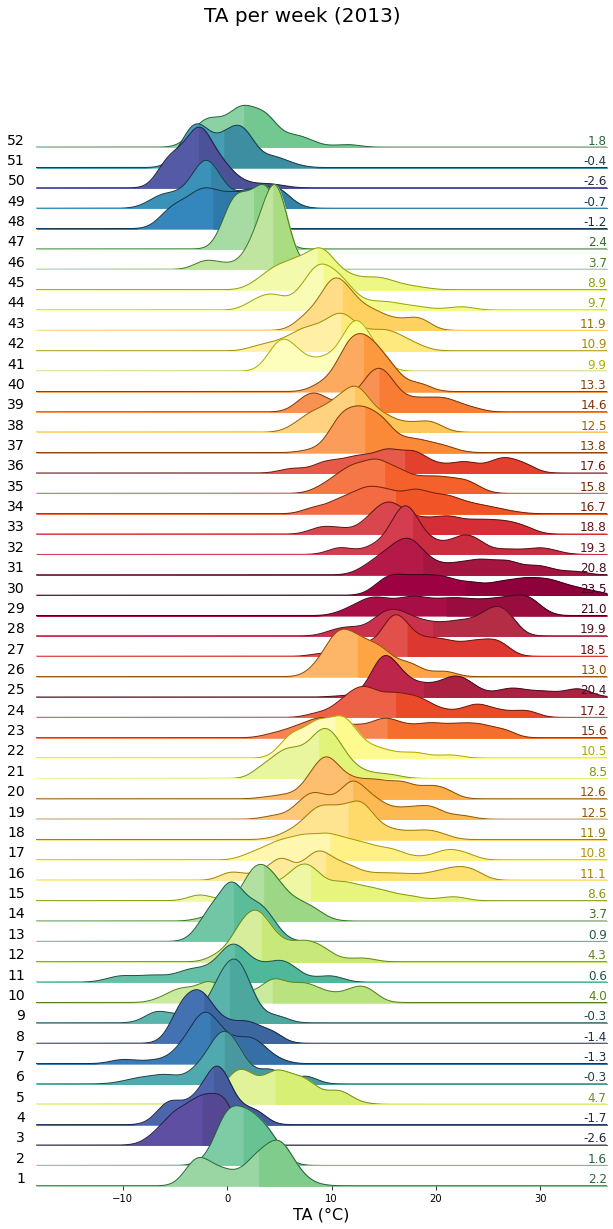

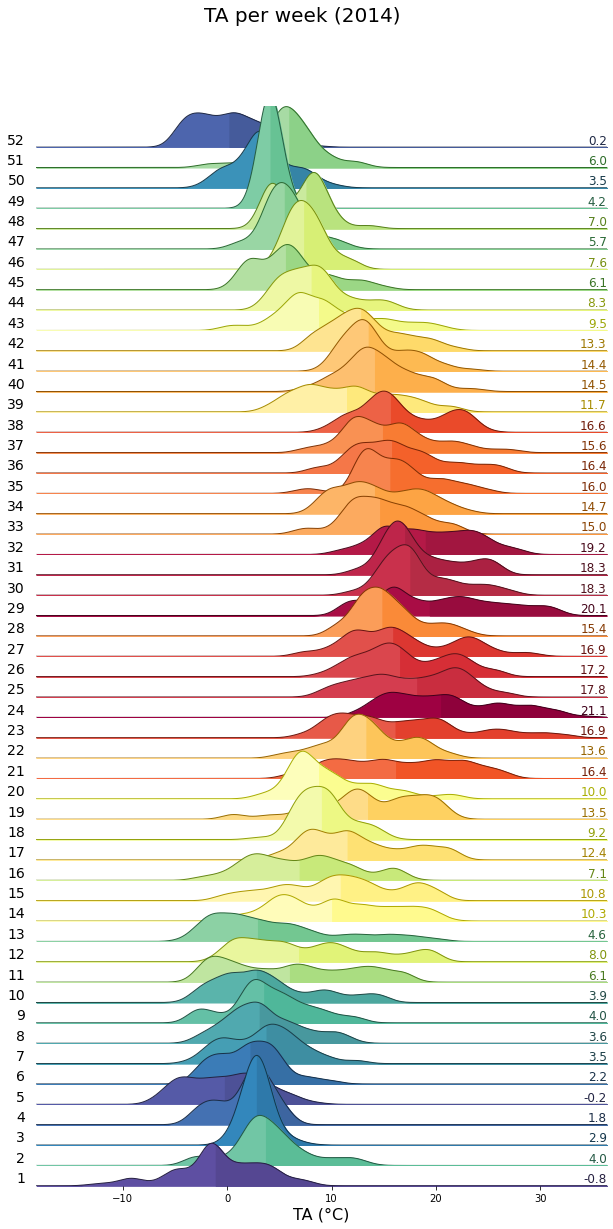

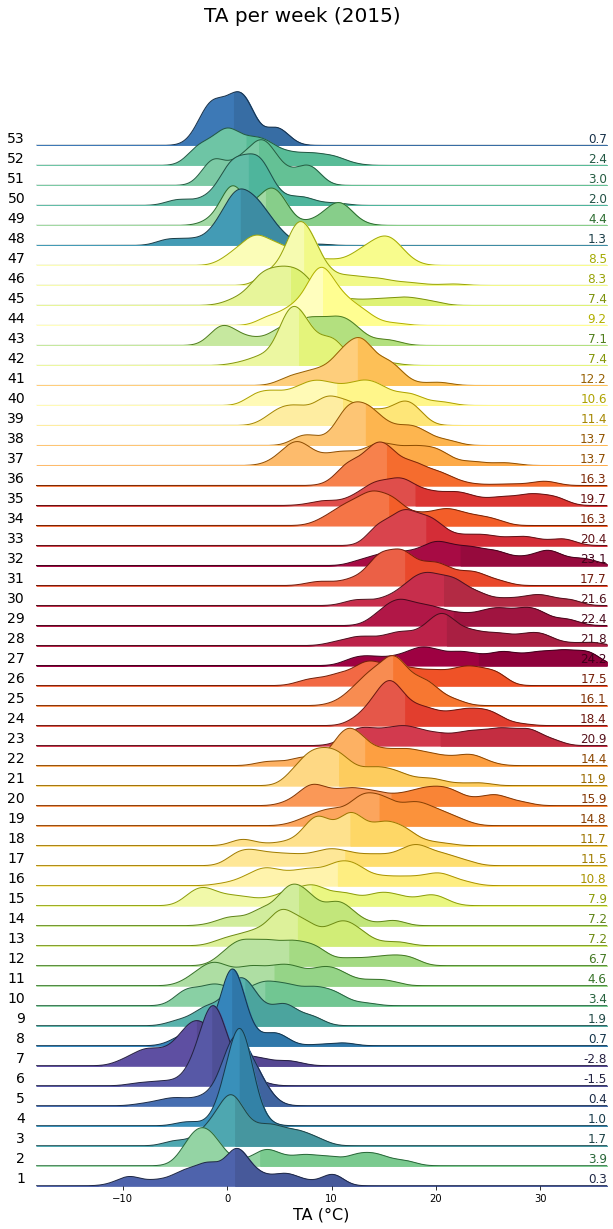

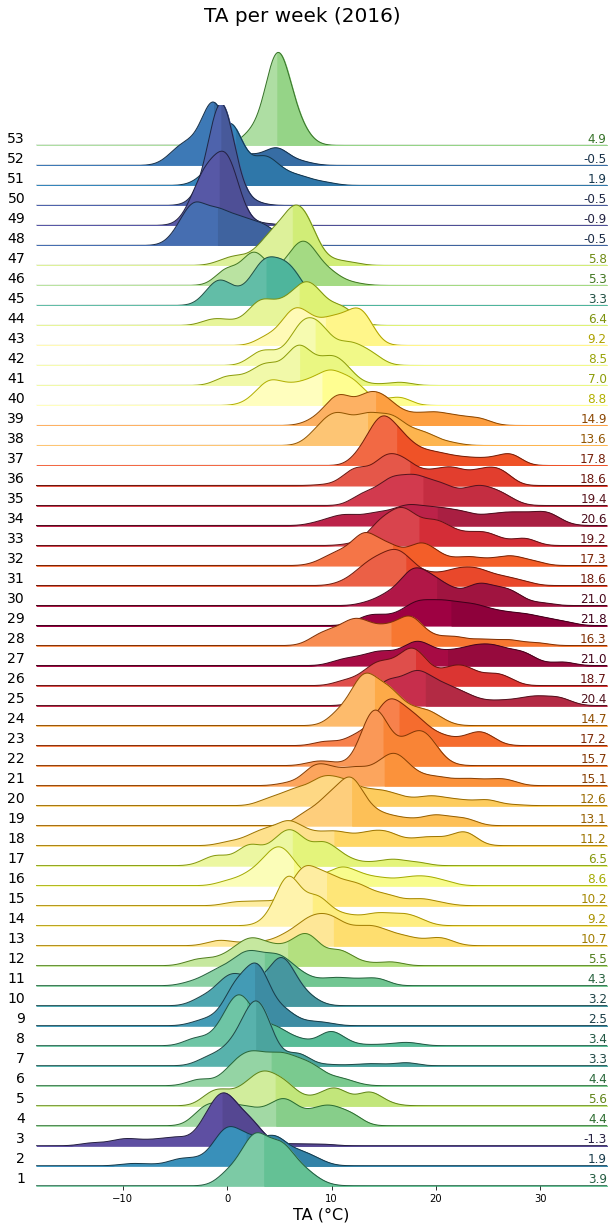

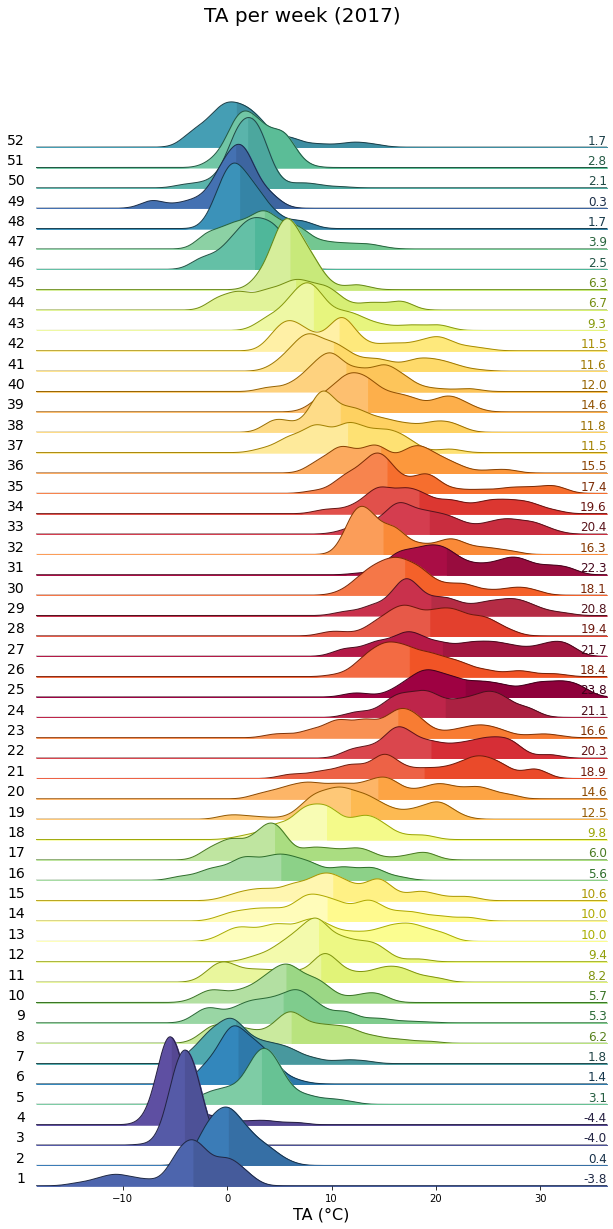

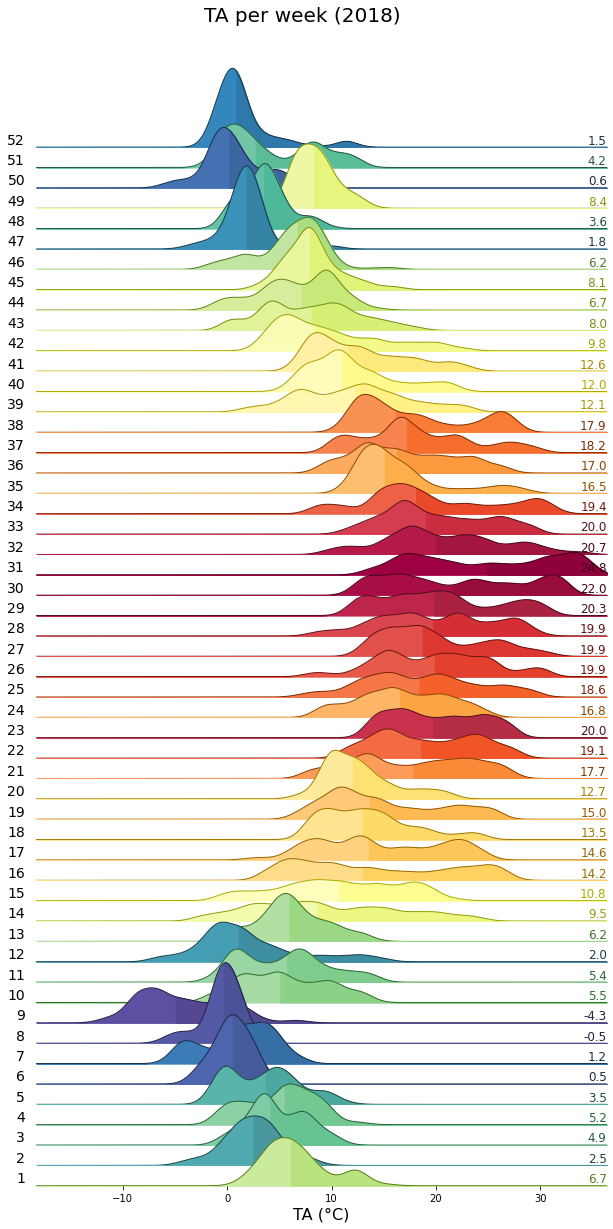

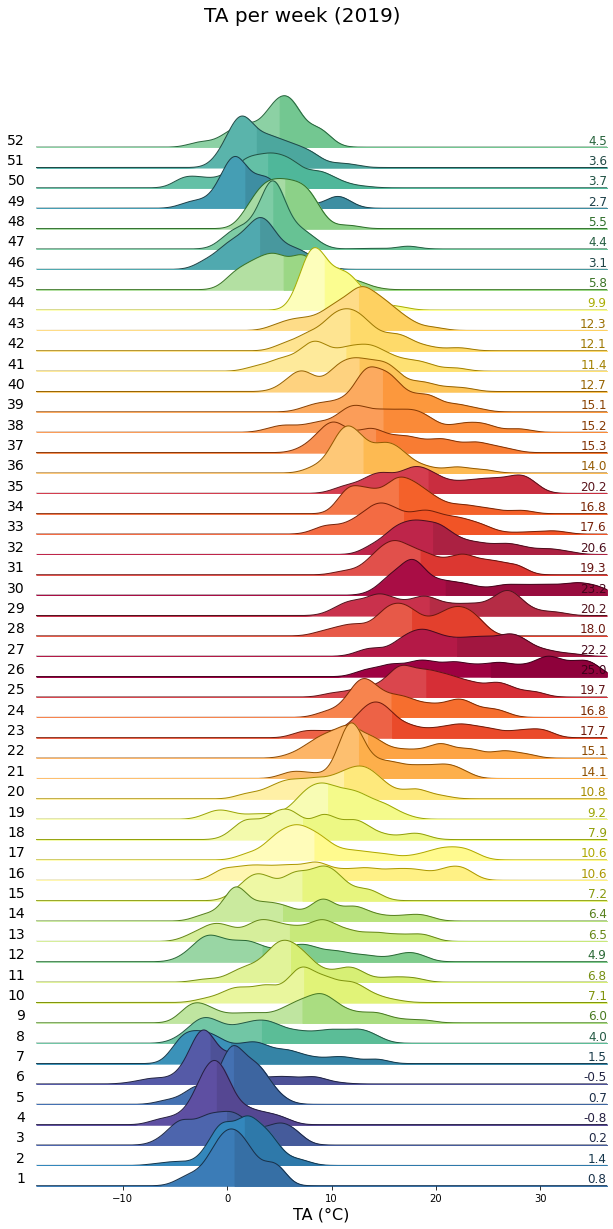

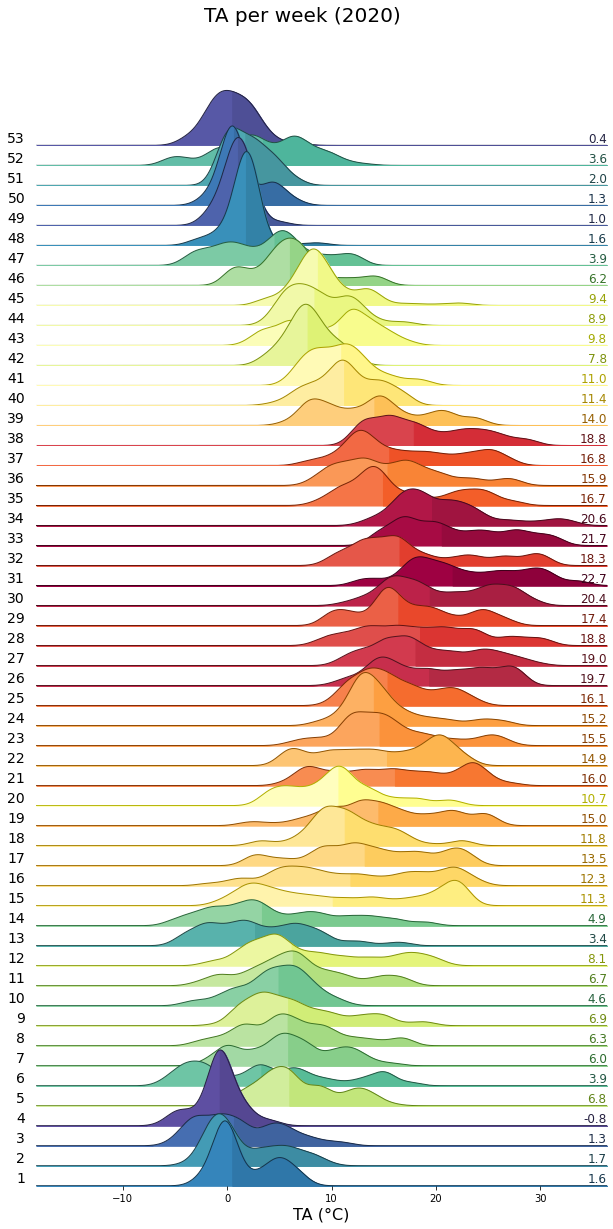

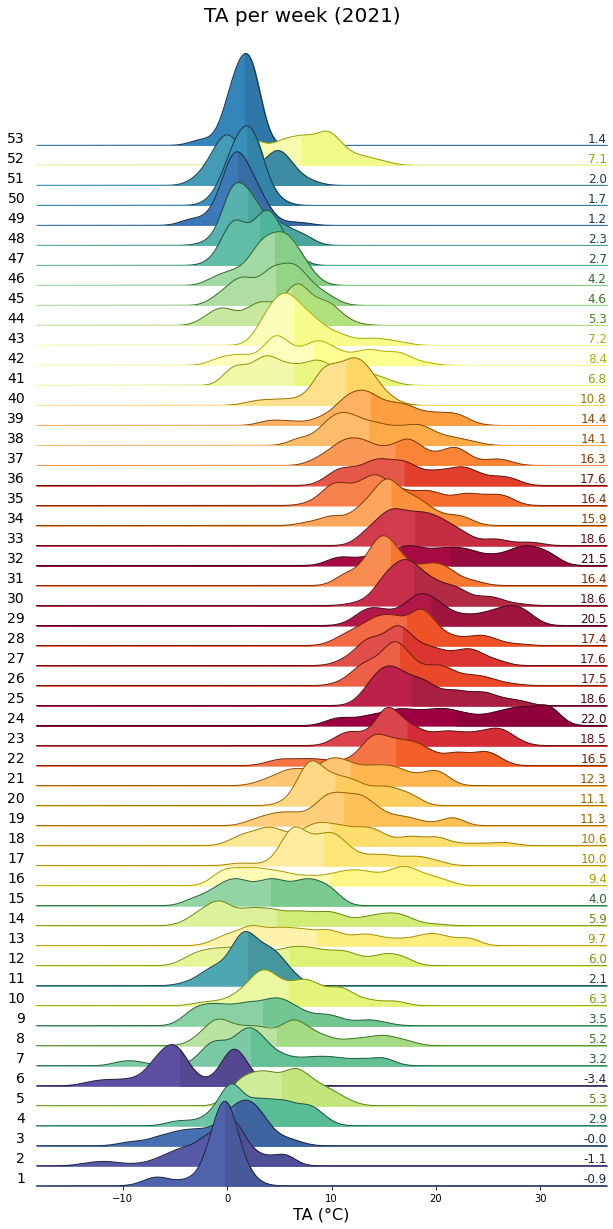

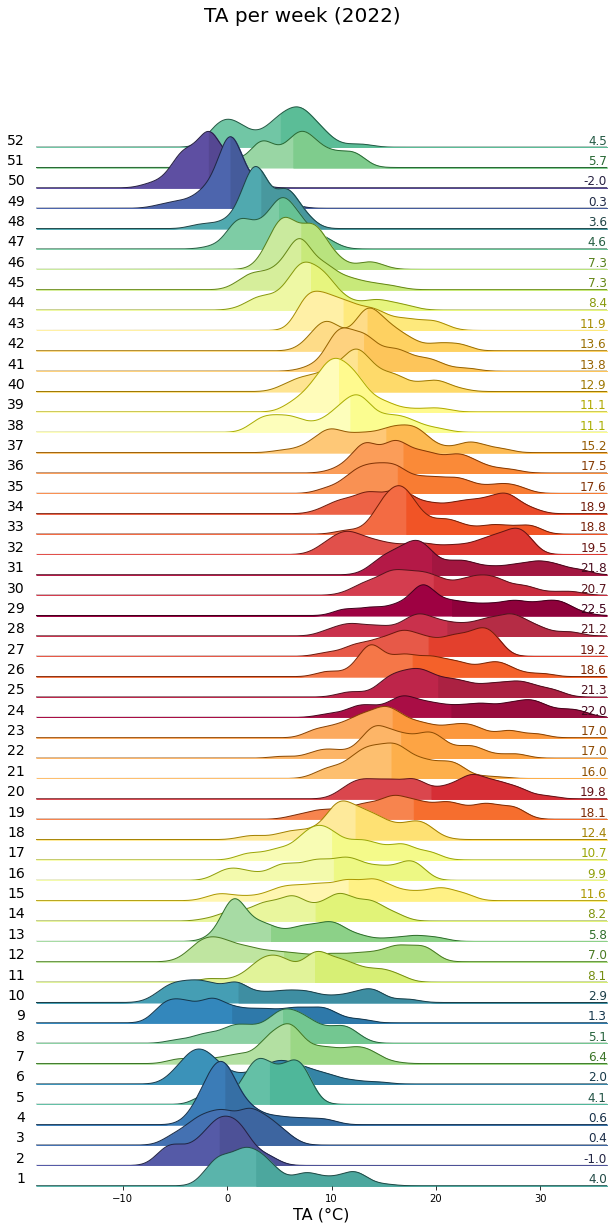

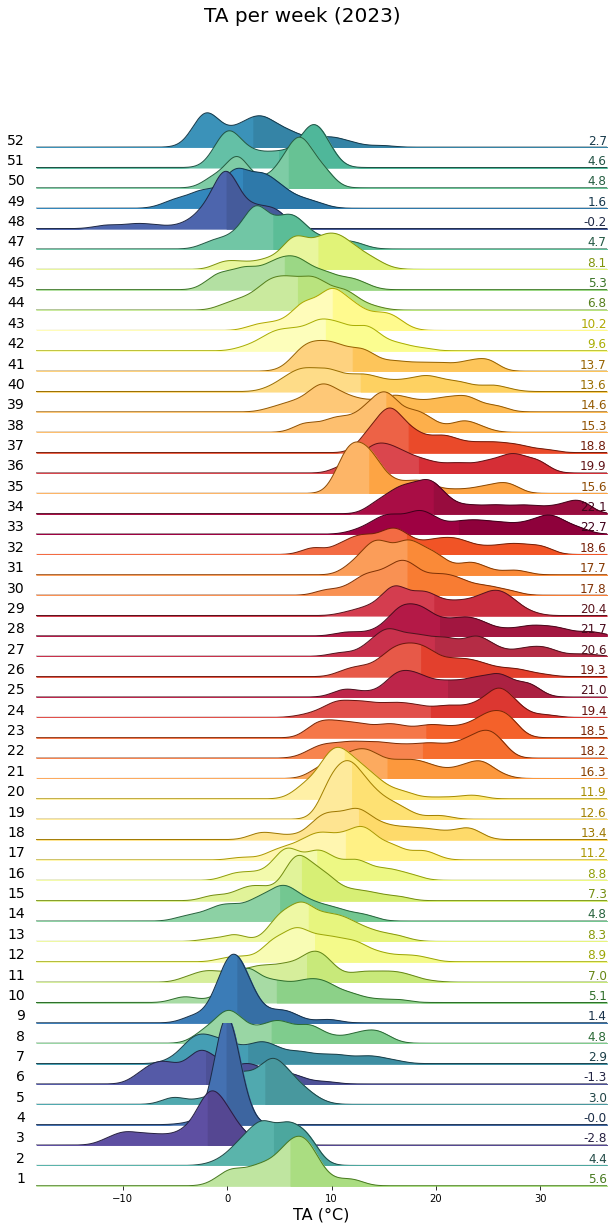

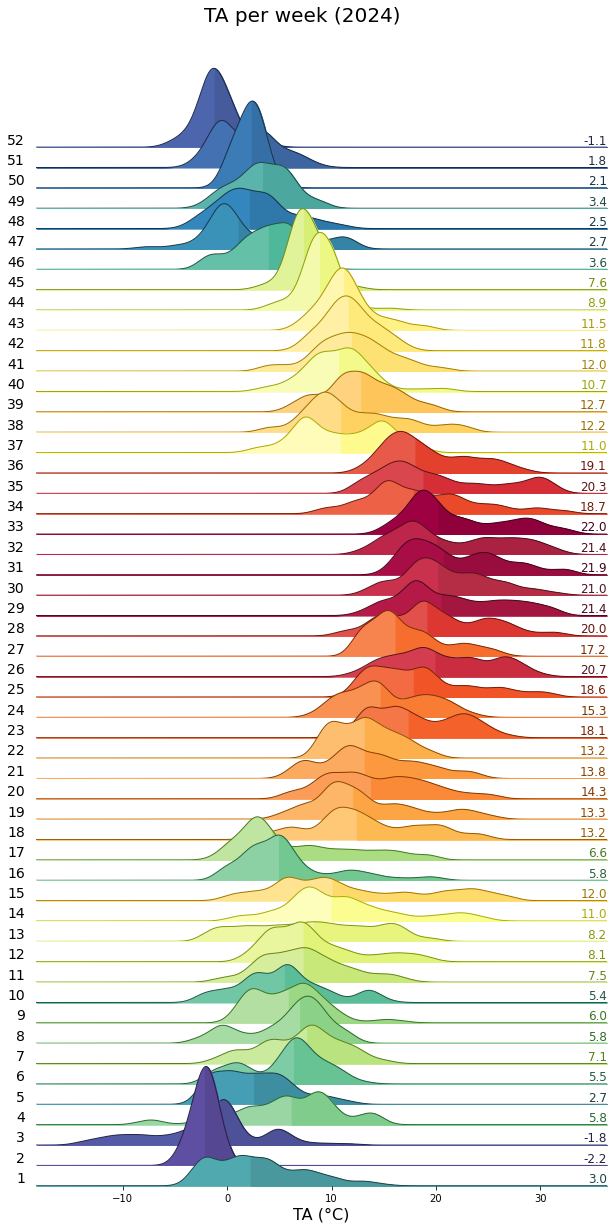

In [42]:
uniq_years = series.index.year.unique()
for uy in uniq_years:
    series_yr = series.loc[series.index.year == uy].copy()
    rp = dv.ridgeline(series=series_yr)
    rp.plot(
        how='weekly',
        kd_kwargs=None,  # params from scikit KernelDensity as dict
        xlim=xlim,  # min/max as list
        ylim=[0, 0.3],  # min/max as list
        hspace=-0.8,  # overlap
        xlabel=f"{var} ({units})",
        fig_width=9,
        fig_height=18,
        shade_percentile=0.5,
        show_mean_line=False,
        fig_title=f"{var} per week ({uy})",
        fig_dpi=72,
        showplot=True,
        ascending=False
    )

</br>

# Cumulative plot

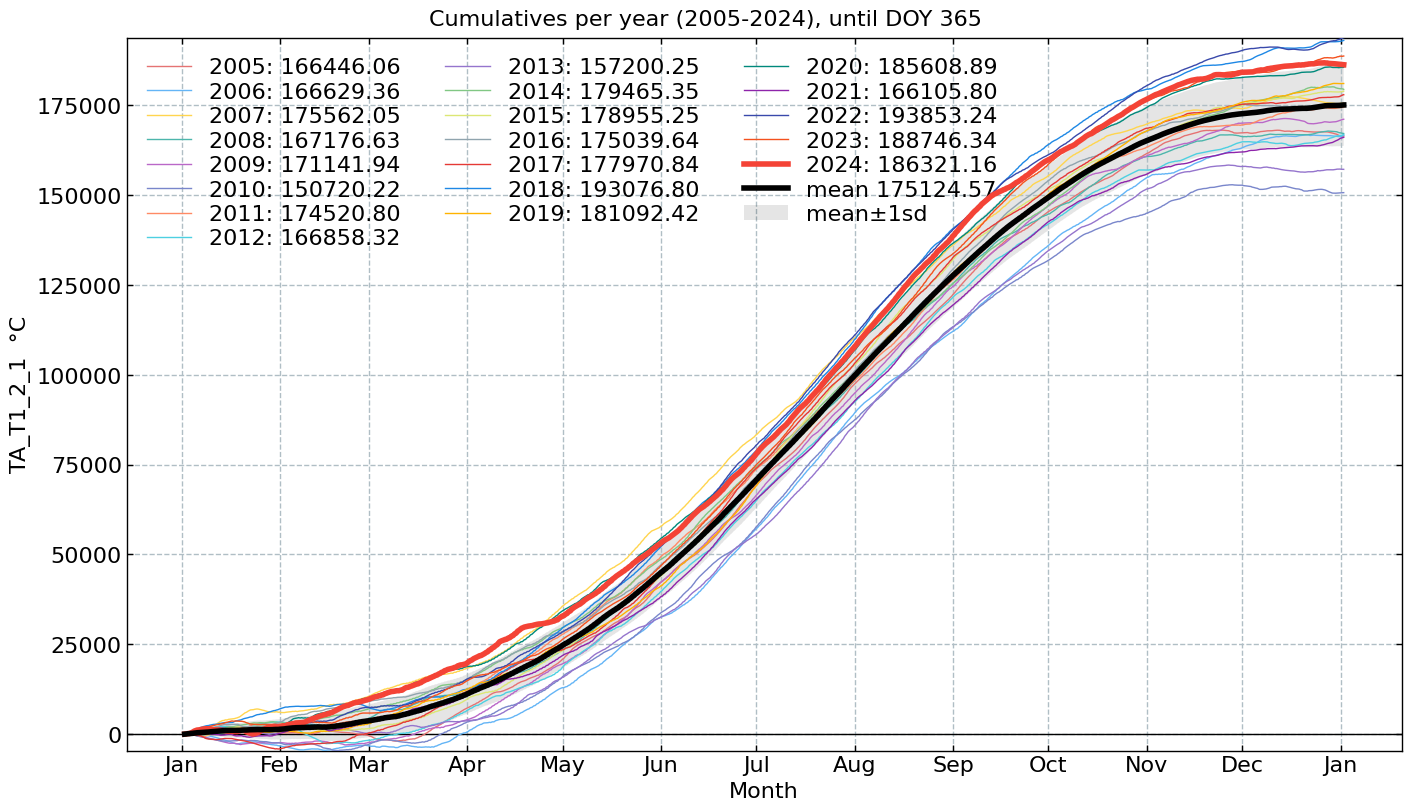

In [43]:
CumulativeYear(
    series=series,
    series_units=units,
    start_year=2005,
    end_year=2024,
    show_reference=True,
    excl_years_from_reference=None,
    highlight_year=2024,
    highlight_year_color='#F44336').plot();

</br>

# Long-term anomalies

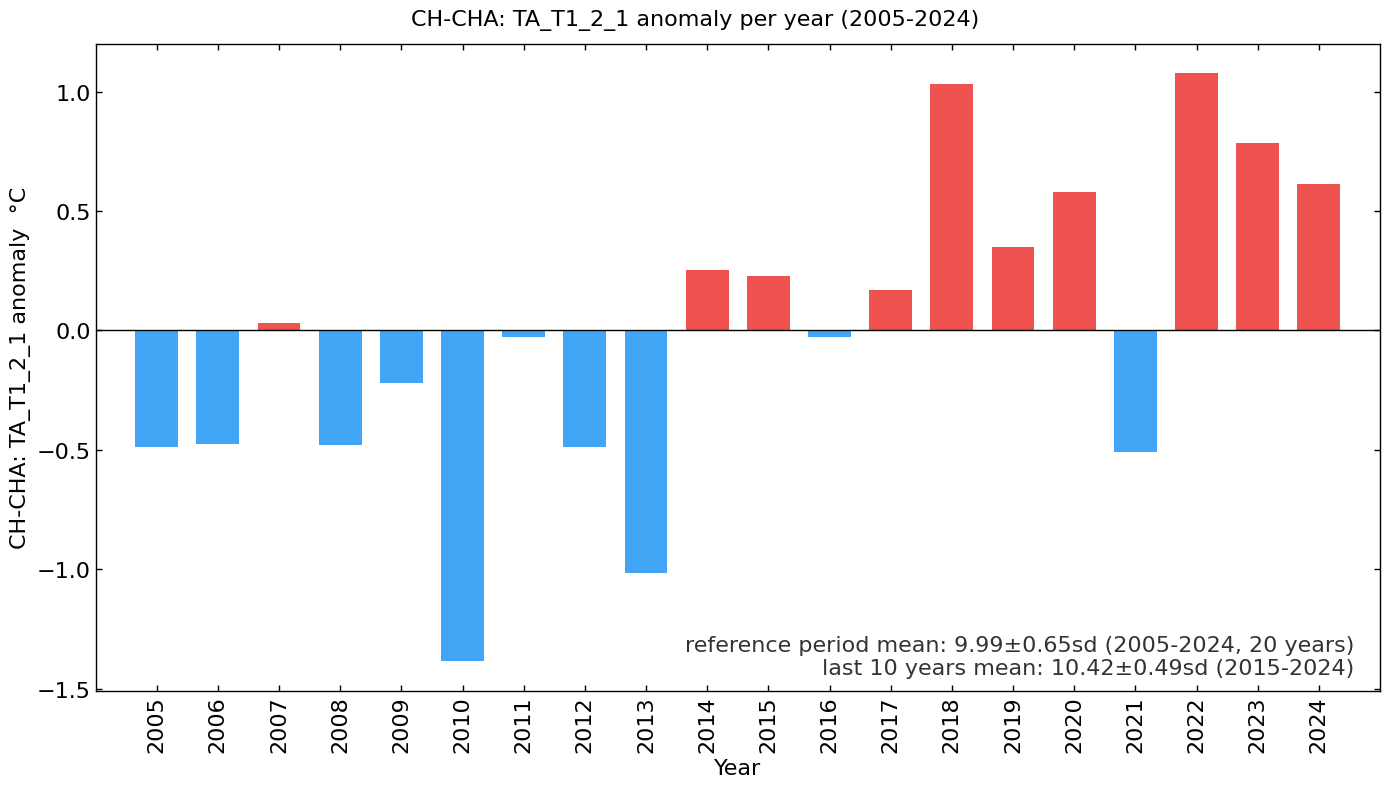

In [44]:
series_yearly_mean = series.resample('YE').mean()
series_yearly_mean.index = series_yearly_mean.index.year
series_label = f"CH-CHA: {varname}"
LongtermAnomaliesYear(series=series_yearly_mean,
                      series_label=series_label,
                      series_units=units,
                      reference_start_year=2005,
                      reference_end_year=2024).plot()

</br>

# End of notebook

In [45]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-05-16 12:56:46
